In [1]:
# Logistic Regression

#import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os

#Exploring data
data_path = os.getcwd()[:-len('Clasificacion')]
db_data_path = data_path + '/data/'
os.listdir(db_data_path) 

['Cancer.csv',
 'diabetes.csv',
 'diabetes.tab.txt',
 'Social_Network_Ads.csv',
 'Social_Network_Ads1.csv']

In [2]:
# Importing the dataset
dataset = pd.read_csv(db_data_path + 'diabetes.csv')
dataset

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                       0.351   31        0  
2                       0.672   32        1  
3                       0.167   21        0  
4                       2.288   33        1  
..                        ...  ...      ...  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0  

[768 rows x 9 columns]

In [84]:
dataset.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [85]:
dataset.describe().T

count        mean         std     min       25%  \
Pregnancies               768.0    3.845052    3.369578   0.000   1.00000   
Glucose                   768.0  120.894531   31.972618   0.000  99.00000   
BloodPressure             768.0   69.105469   19.355807   0.000  62.00000   
SkinThickness             768.0   20.536458   15.952218   0.000   0.00000   
Insulin                   768.0   79.799479  115.244002   0.000   0.00000   
BMI                       768.0   31.992578    7.884160   0.000  27.30000   
DiabetesPedigreeFunction  768.0    0.471876    0.331329   0.078   0.24375   
Age                       768.0   33.240885   11.760232  21.000  24.00000   
Outcome                   768.0    0.348958    0.476951   0.000   0.00000   

                               50%        75%     max  
Pregnancies                 3.0000    6.00000   17.00  
Glucose                   117.0000  140.25000  199.00  
BloodPressure              72.0000   80.00000  122.00  
SkinThickness              23.0000   32.00000   99.00  
Insulin                    30.5000  127.25000  846.00  
BMI                        32.0000   36.60000   67.10  
DiabetesPedigreeFunction    0.3725    0.62625    2.42  
Age                        29.0000   41.00000   81.00  
Outcome                     0.0000    1.00000    1.00

In [87]:
dataset.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

0    500
1    268
Name: Outcome, dtype: int64


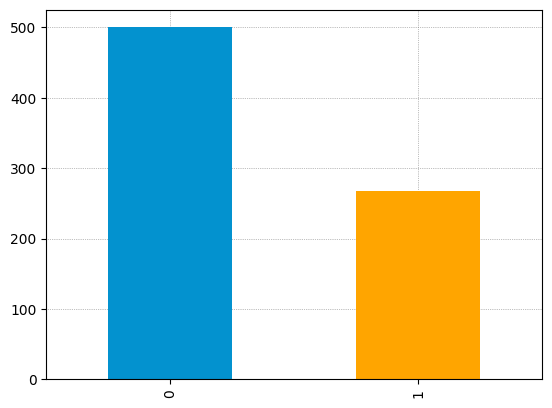

In [88]:
print(dataset.Outcome.value_counts())
p=dataset.Outcome.value_counts().plot(kind="bar",color=['#0392cf', 'orange'])
plt.grid(color='gray', linestyle=':', linewidth=0.5)
plt.gca().set_axisbelow(True)

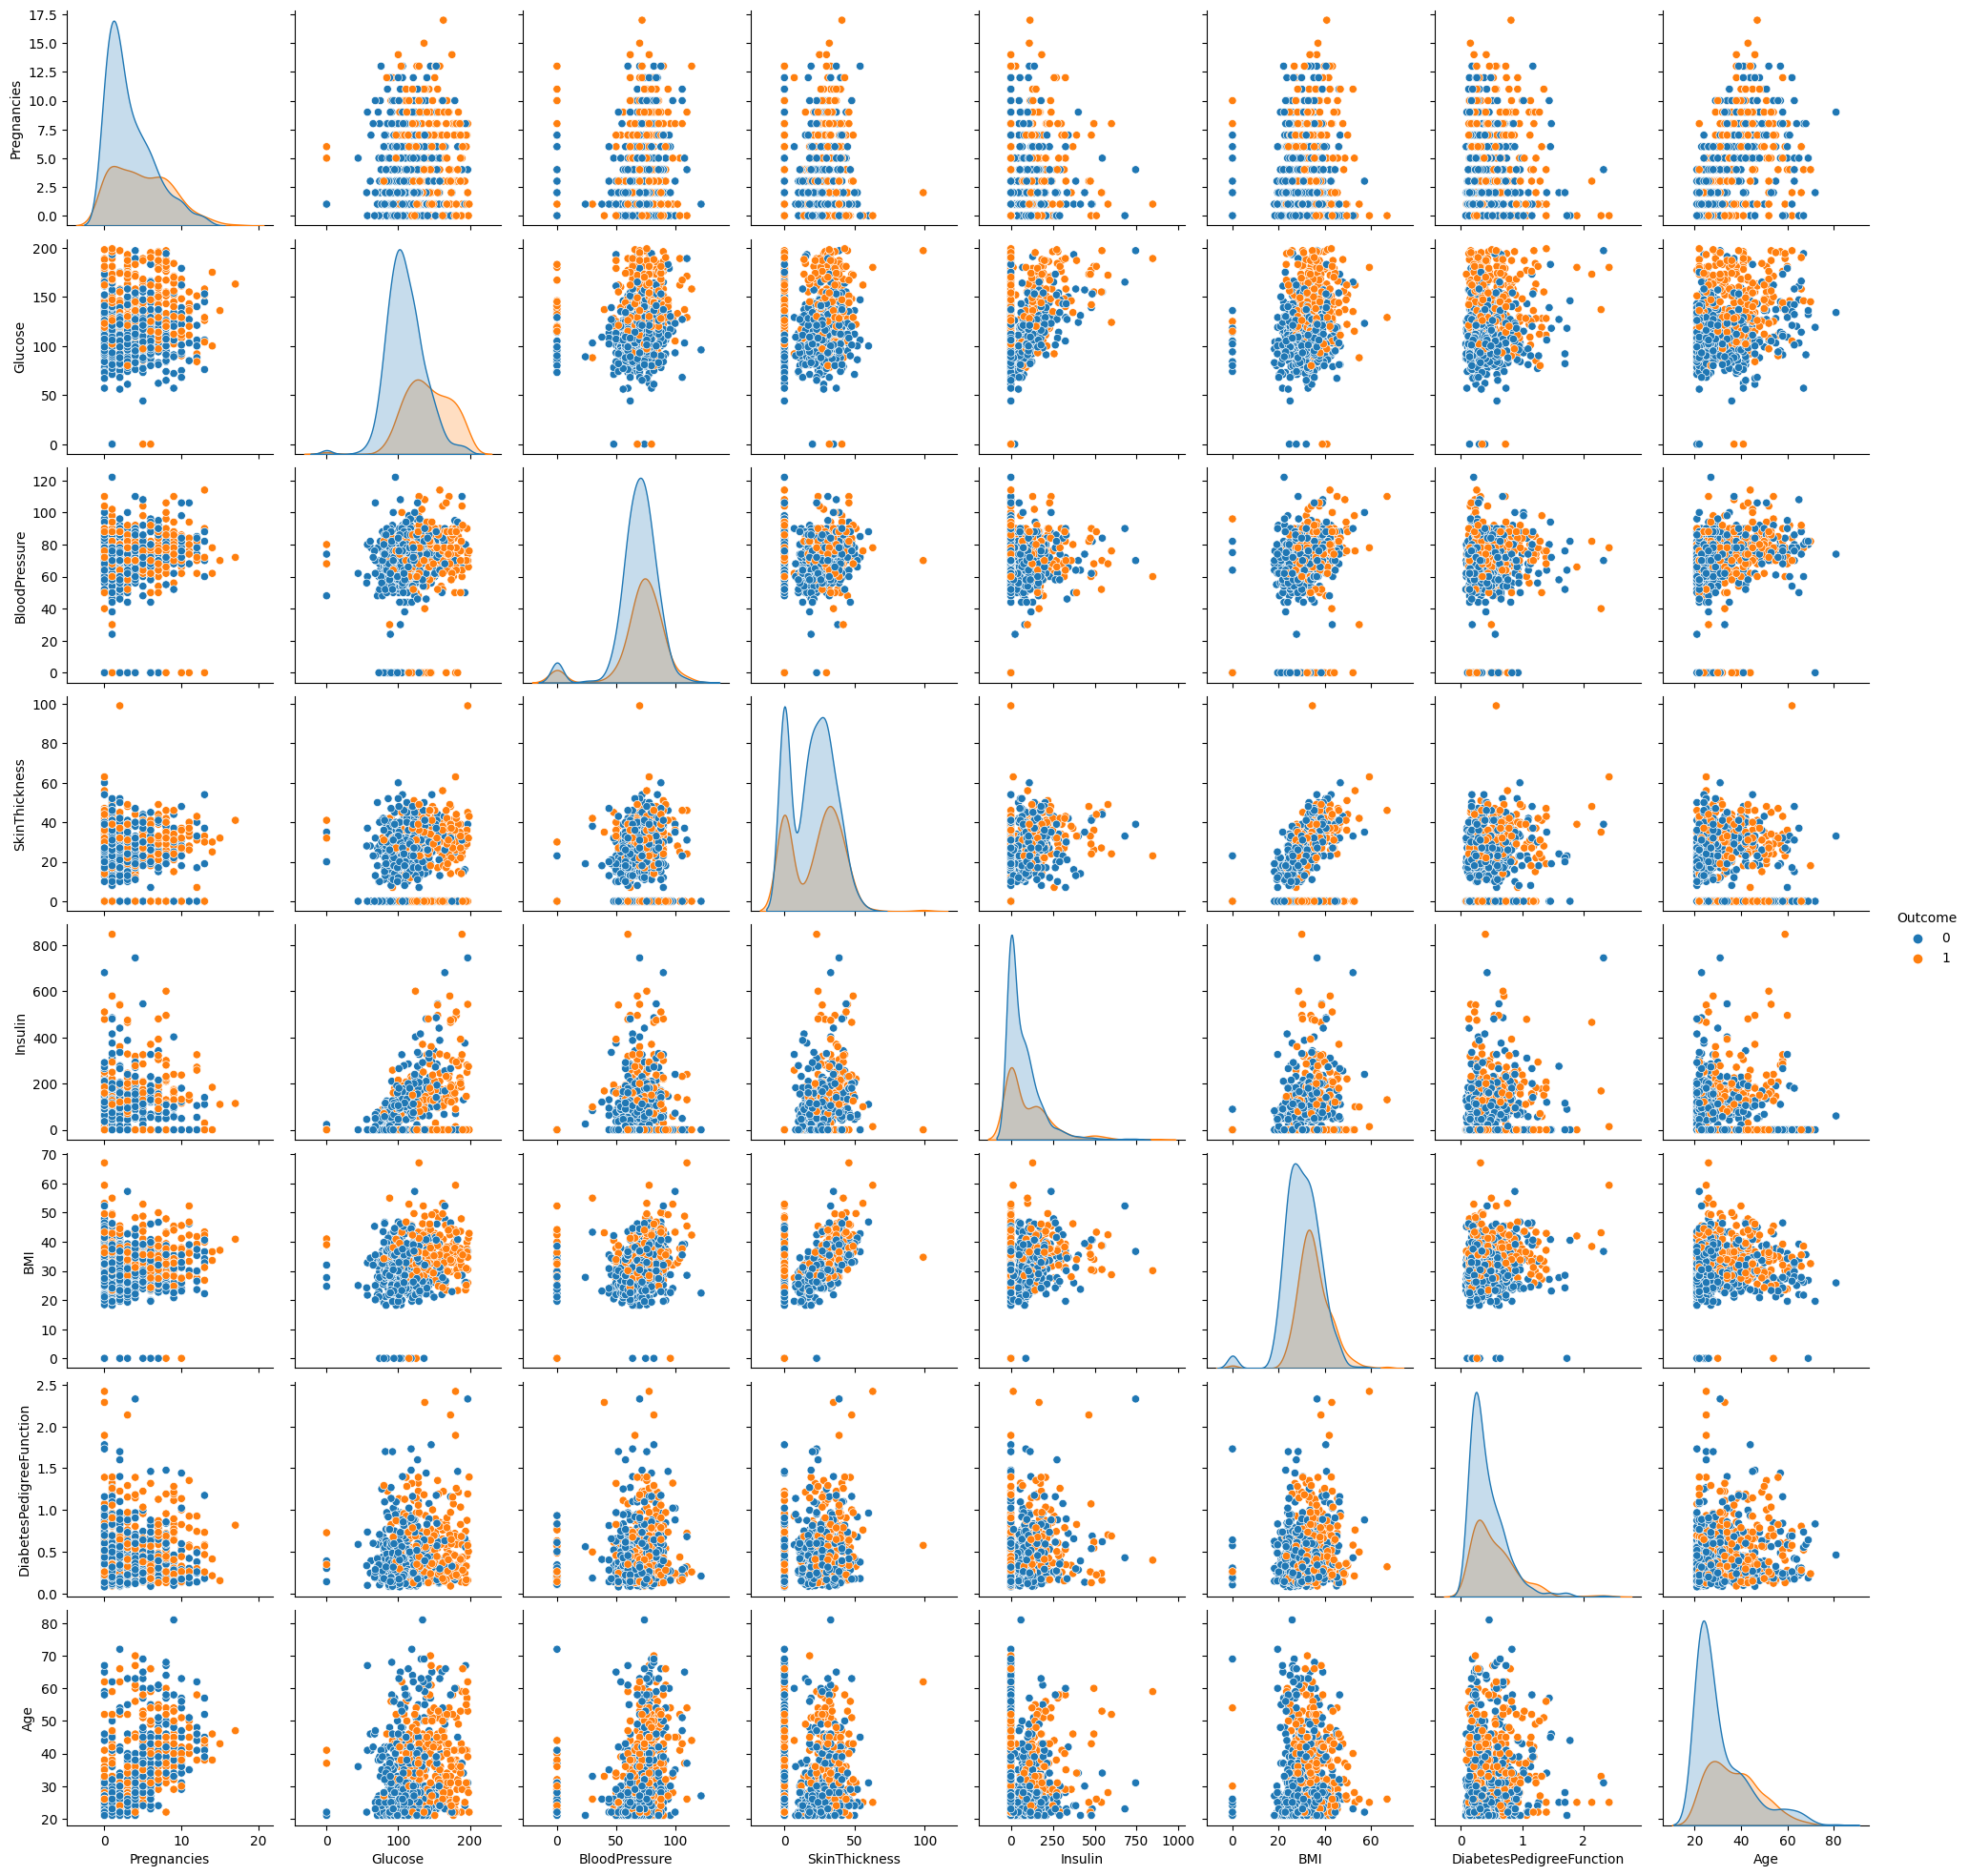

In [99]:
p=sns.pairplot(dataset, hue = 'Outcome')

# Sklearn Analisis

In [3]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [5]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [6]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [7]:
#Models to train to classify 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm

models = [('LogisticRegression', LogisticRegression()),
          ('Suport Vector Classifer', SVC()),
          ('Suport Vector Classifer2', svm.SVC(kernel='rbf', C=1.0)),
          ('Naive Bayes', GaussianNB()),
          ('Decision Tree Classifier',DecisionTreeClassifier()),
          ('Random Forest Classifier',RandomForestClassifier()),
          ('KNN',KNeighborsClassifier(n_neighbors=5))]

for model in models: #for loop through the three models
    classifier = model[1]  #initialize the model object
    classifier.fit(X_train,y_train)  #fitting the training data
    pred = classifier.predict(X_test)  #predict target
    print(model[0])
    score = classifier.score(X_test, y_test) 
    print("Accurcay is :",round(score,2)*100,"%")
    print('-'*30)

LogisticRegression
Accurcay is : 80.0 %
------------------------------
Suport Vector Classifer
Accurcay is : 78.0 %
------------------------------
Suport Vector Classifer2
Accurcay is : 78.0 %
------------------------------
Naive Bayes
Accurcay is : 77.0 %
------------------------------
Decision Tree Classifier
Accurcay is : 72.0 %
------------------------------
Random Forest Classifier
Accurcay is : 79.0 %
------------------------------
KNN
Accurcay is : 80.0 %
------------------------------


In [79]:
#classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier = RandomForestClassifier()
classifier.fit(X_train, y_train)

# Predicting a new result
print(classifier.predict(sc.transform([[6,148,72,35,0,33.6,0.627,50]])))

# Predicting the Test set results
y_pred = classifier.predict(X_test)
#print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[1]
[[115  15]
 [ 28  34]]


0.7760416666666666

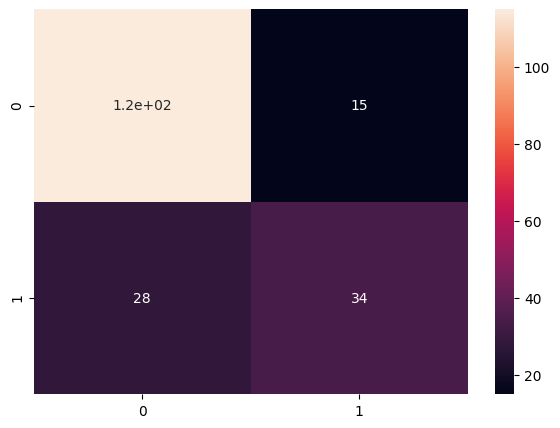

In [80]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(7, 5))
sns.heatmap(mat, annot=True)
plt.show()

In [81]:
from sklearn.metrics import classification_report
target_names = ['Diabetes', 'Normal']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

    Diabetes       0.80      0.88      0.84       130
      Normal       0.69      0.55      0.61        62

    accuracy                           0.78       192
   macro avg       0.75      0.72      0.73       192
weighted avg       0.77      0.78      0.77       192



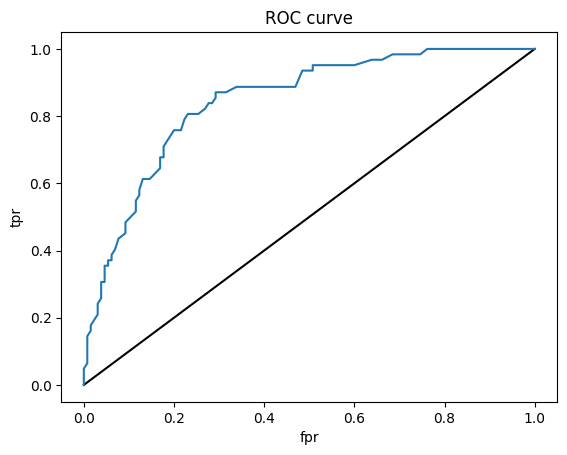

In [82]:
from sklearn.metrics import roc_curve
y_pred_proba = classifier.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot([0,1],[0,1],'k-')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC curve')
plt.show()

# Plot Bondary Regions
Vamos a plotear por regiones (2 regiones en 2 regiones con mlxtend.plotting y con matplotlib) 

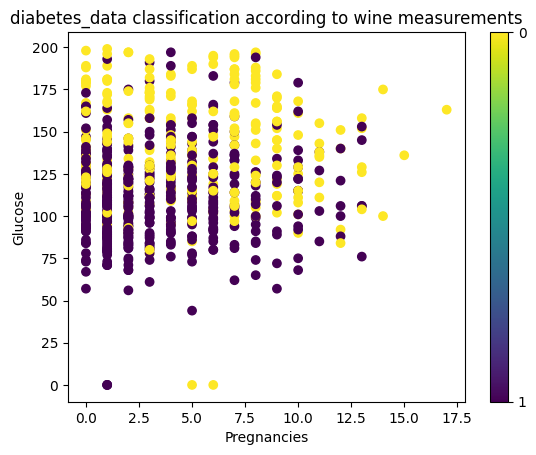

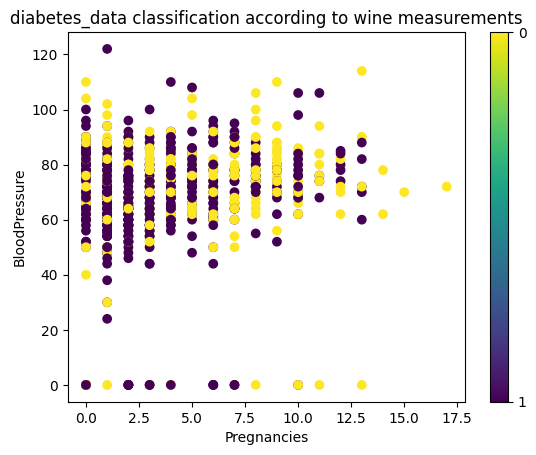

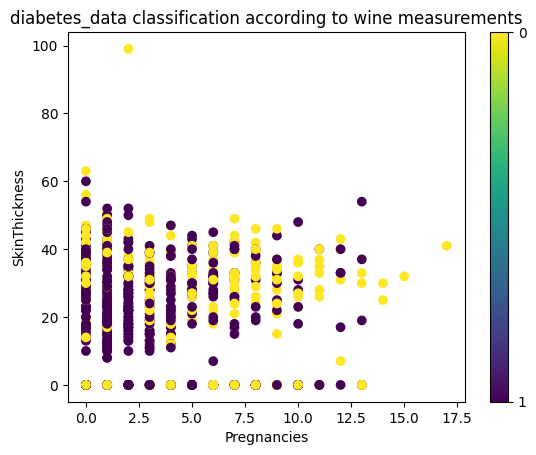

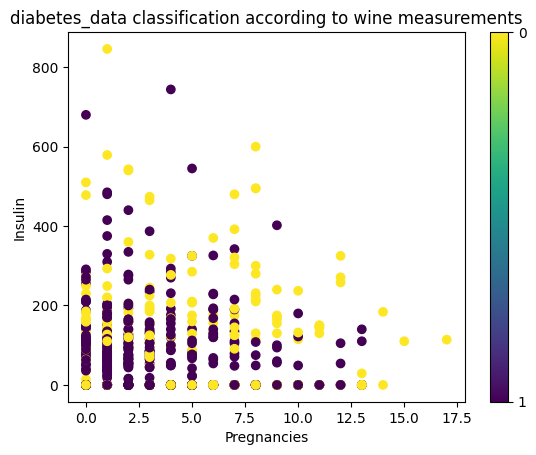

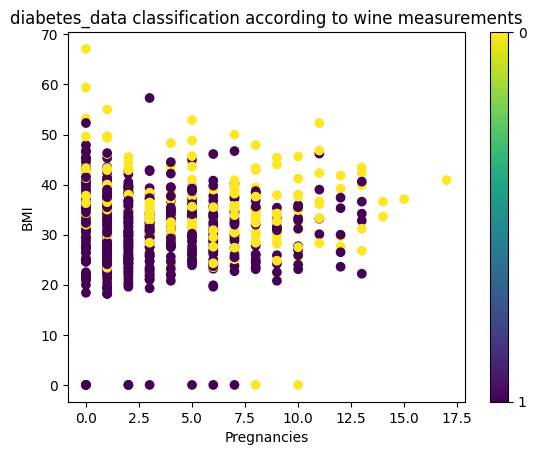

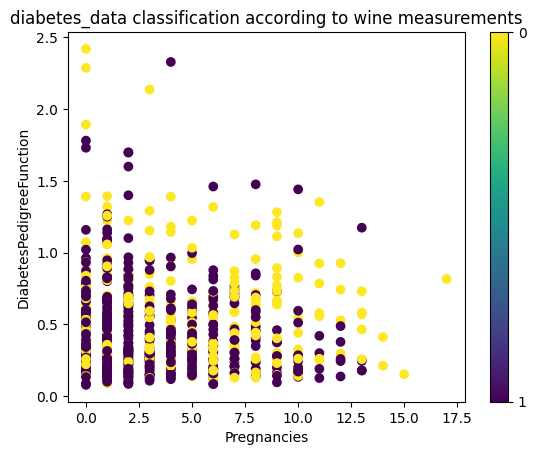

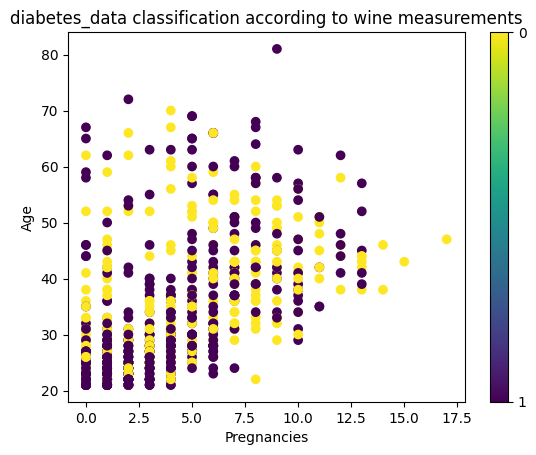

In [30]:
def plot(i):
    p=dataset.iloc[:, i]
    for j in range (1,8):
        s=dataset.iloc[:,j]
        formatter = plt.FuncFormatter(lambda i, *args: dataset.iloc[:,-1][int(i)])
        plt.scatter(p, s, c= dataset['Outcome'])
        plt.colorbar(ticks=[0, 1, 2], format=formatter)
        plt.xlabel(dataset.columns[i])
        plt.ylabel(dataset.columns[j])
        plt.title("diabetes_data classification according to wine measurements")
        plt.show()
plot(0)

C:\Users\sebas\AppData\Local\Temp\ipykernel_2888\1806441771.py:12: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


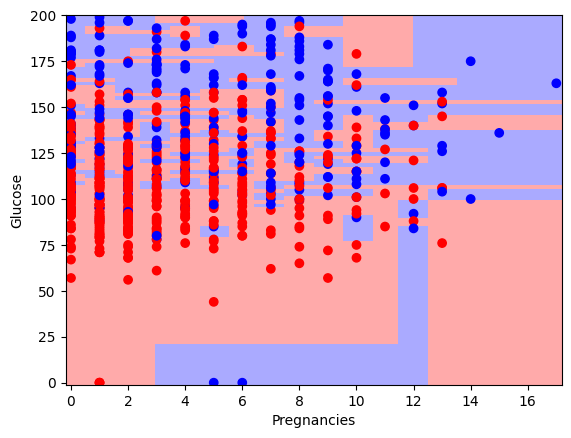

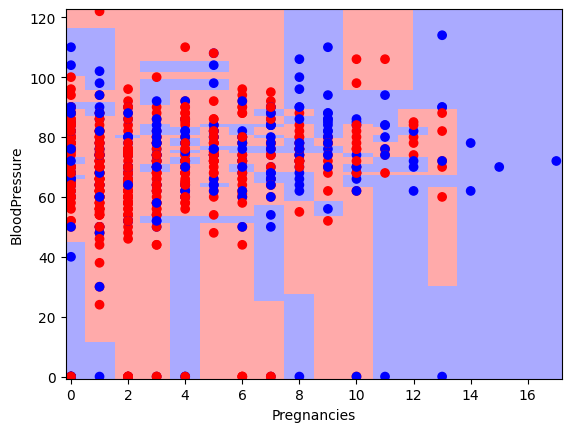

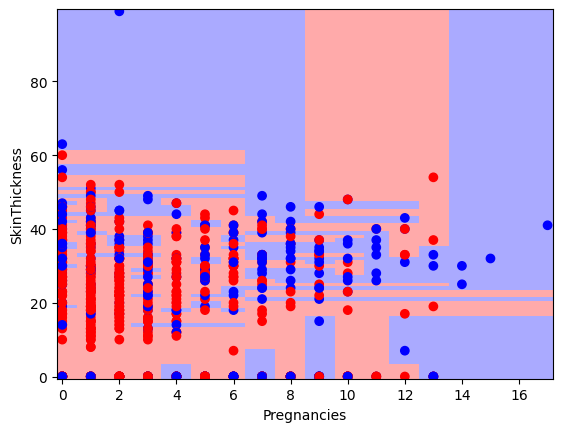

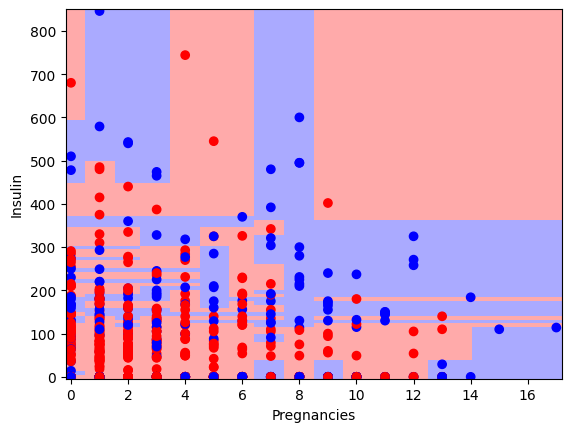

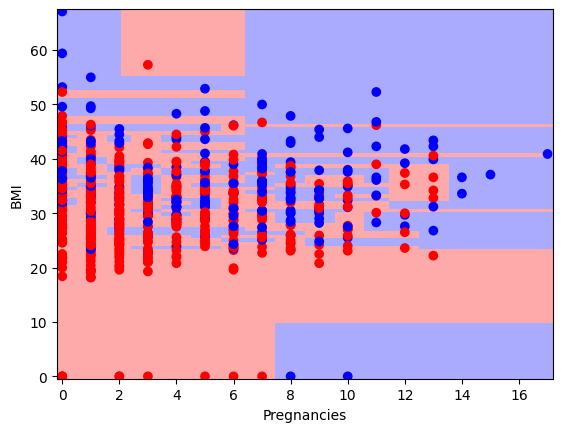

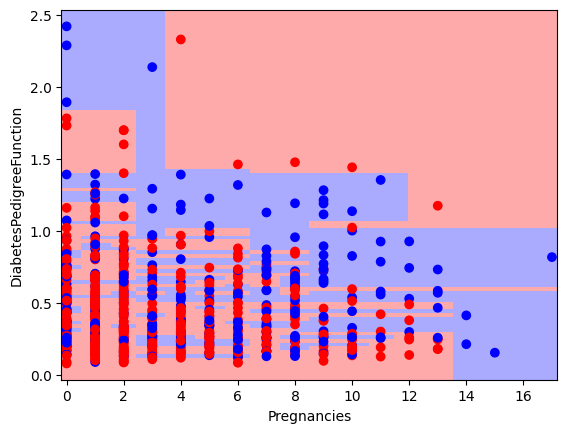

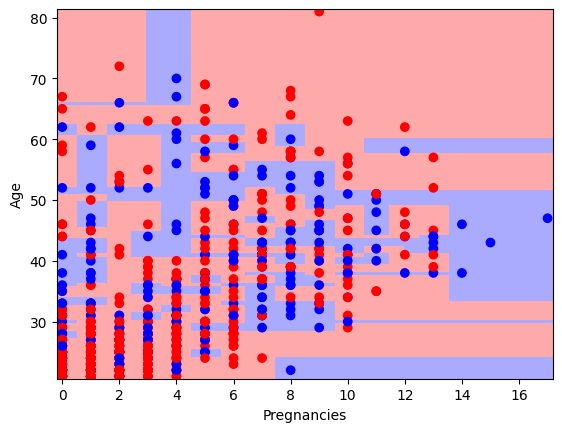

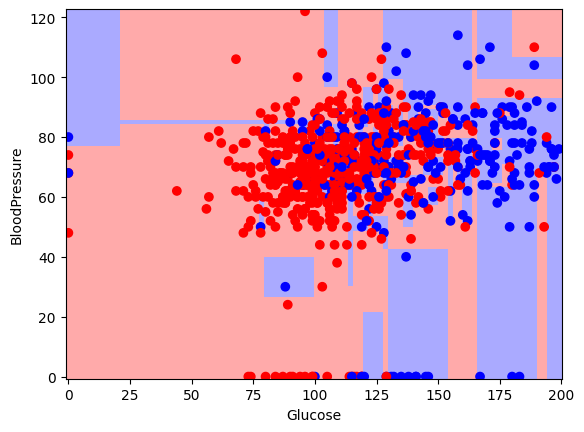

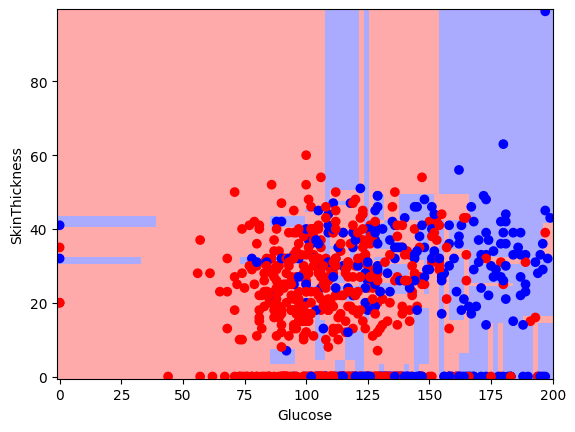

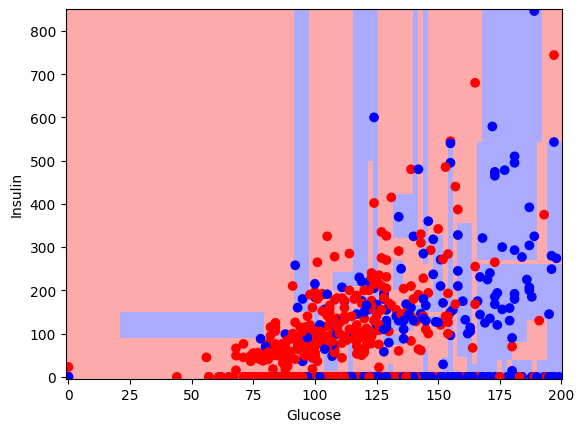

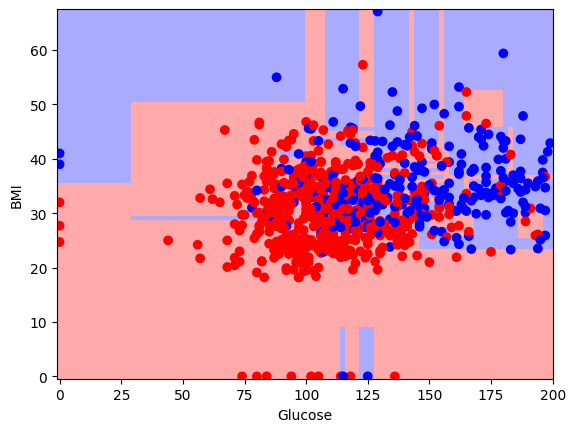

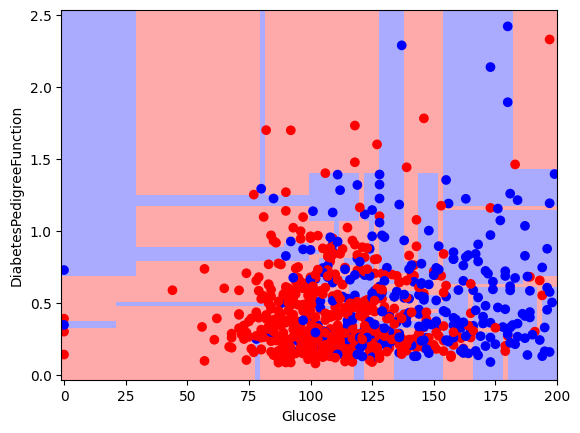

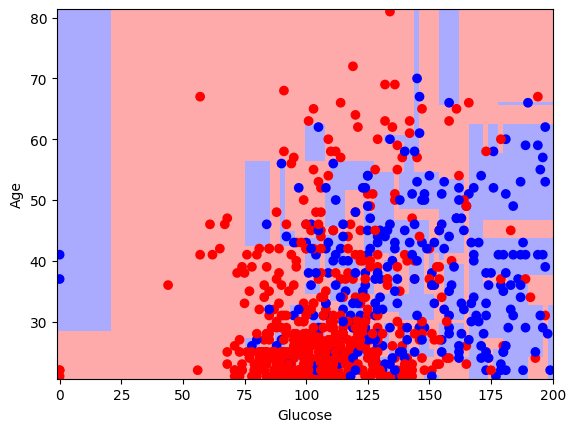

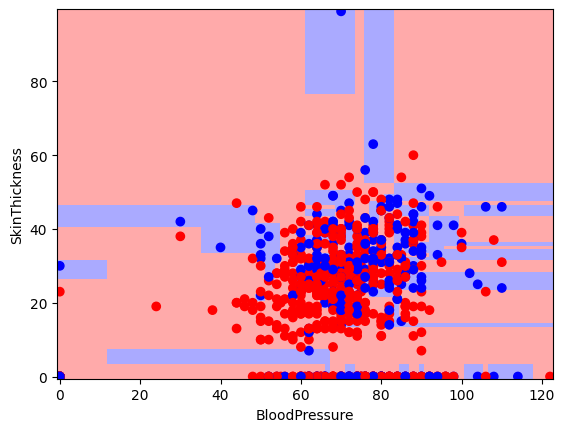

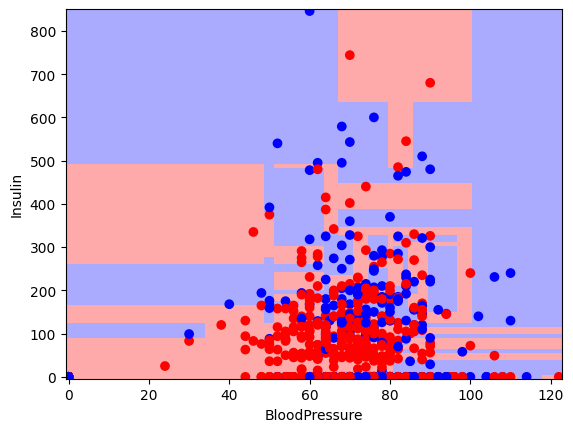

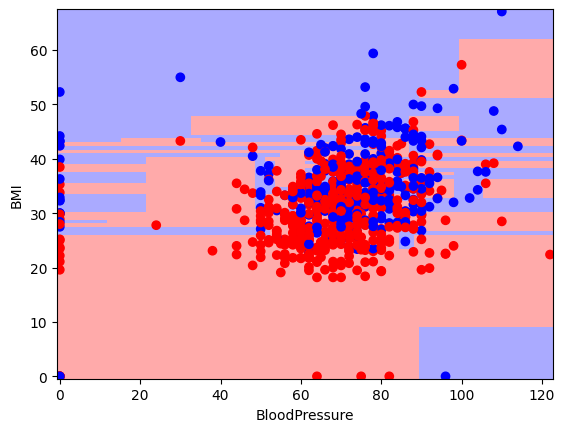

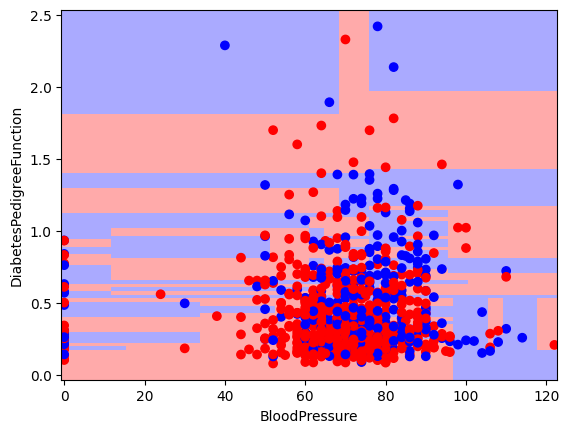

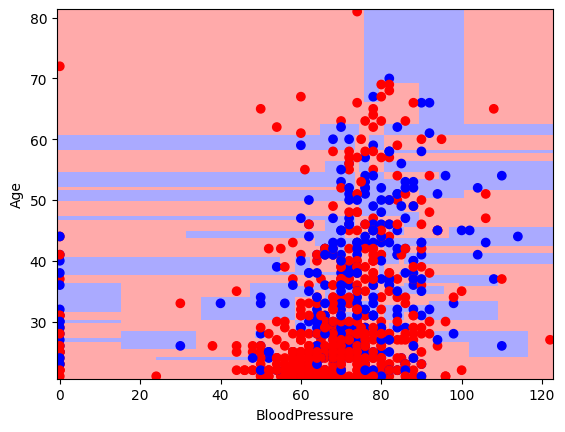

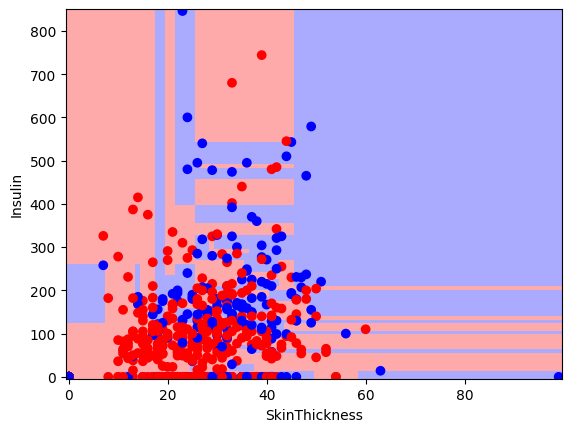

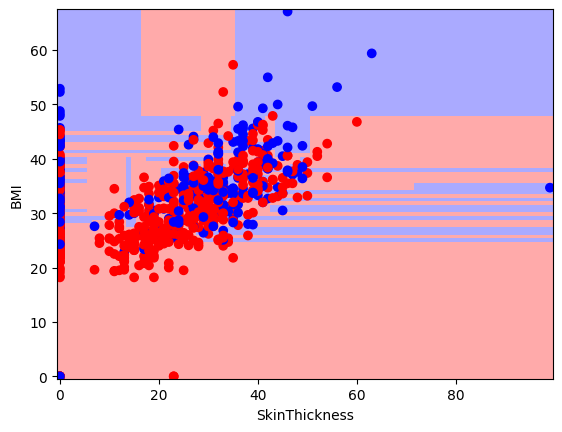

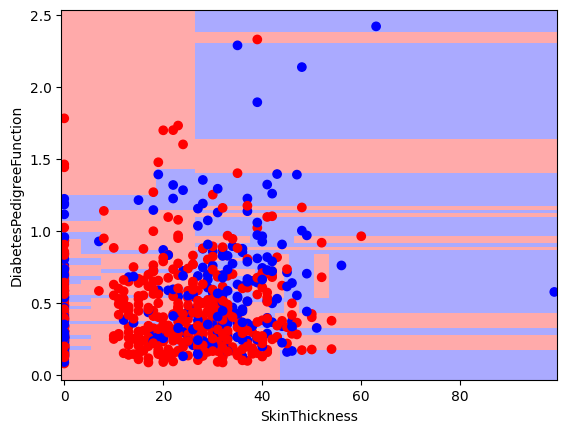

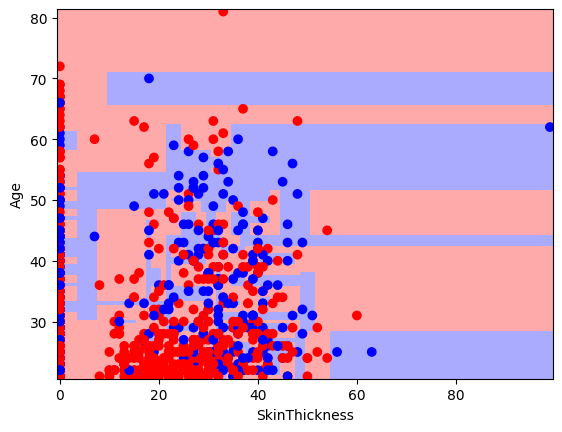

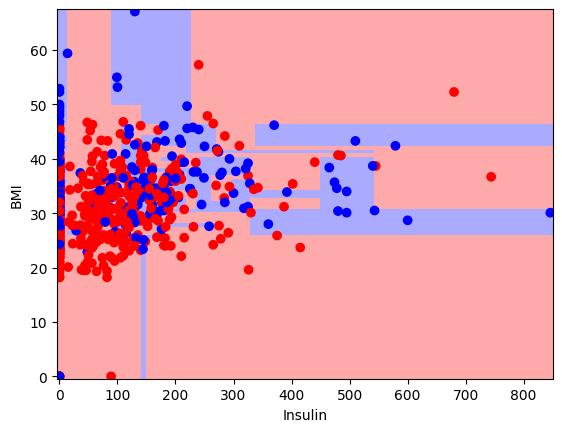

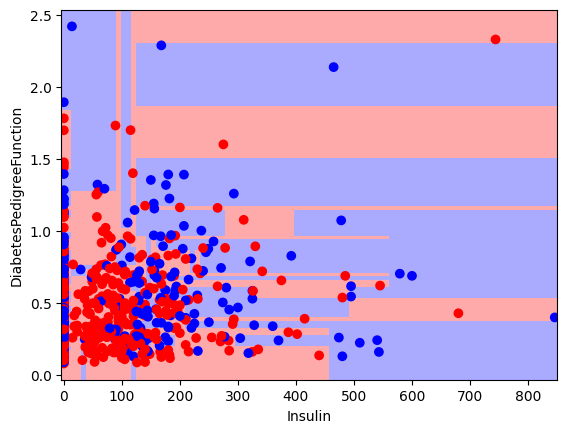

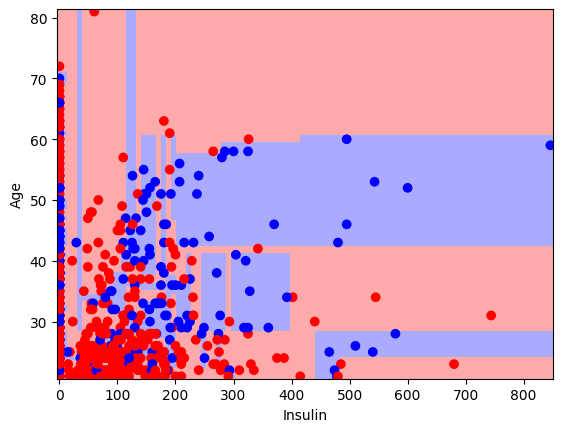

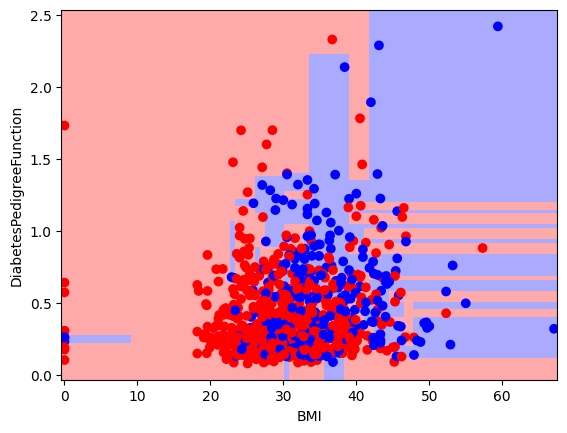

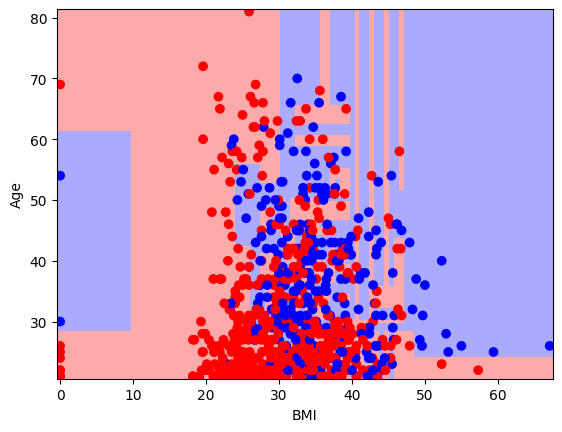

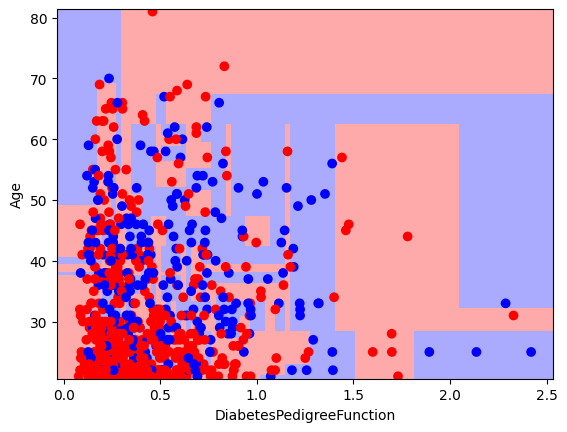

In [70]:
def plot_class_map(clf, X, y, title="", **params):
    C = 1.0  # SVM regularization parameter

    clf.fit(X, y)
    x_min, x_max = X[:, 0].min() - .1, X[:, 0].max() + .1
    y_min, y_max = X[:, 1].min() - .1, X[:, 1].max() + .1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure()

    from matplotlib.colors import ListedColormap
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
    #Plot training points as well
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
    plt.xlabel(dataset.columns[i])
    plt.ylabel(dataset.columns[j])
    plt.axis('tight')
    plt.title(title)


clf = DecisionTreeClassifier()
clf.fit(X,y)

feat = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI', 'DiabetesPedigreeFunction', 'Age']
size = len(feat)
for i in range(0,size):
    for j in range(i+1,size):    
        #print(feat[0],feat[i])
        X=dataset[[feat[i],feat[j]]].values
        plot_class_map(clf, X, y)

    


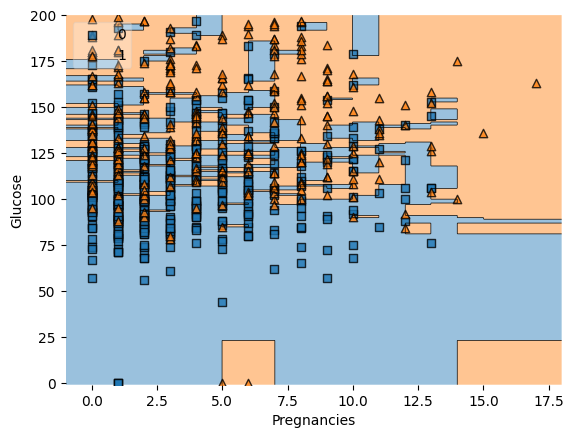

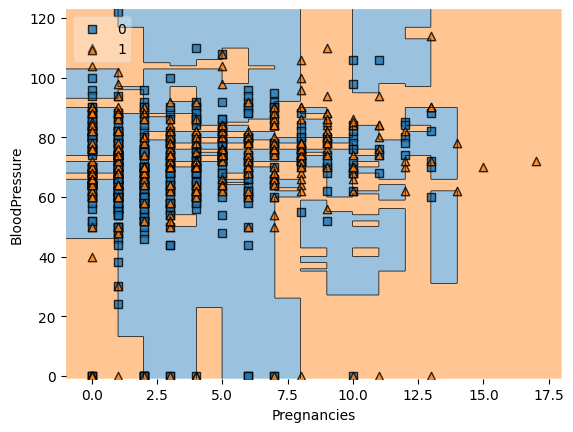

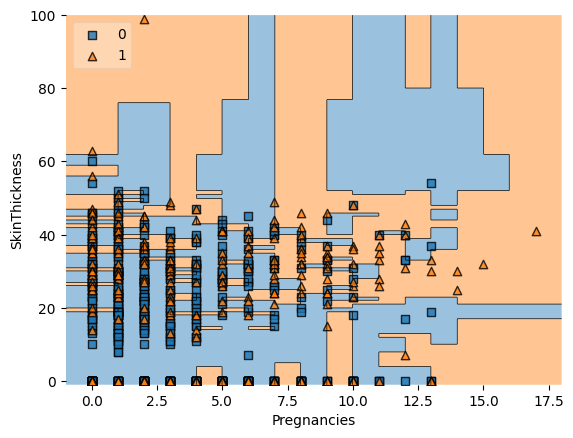

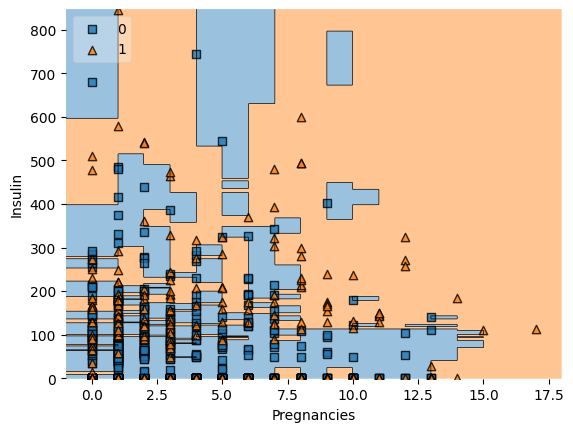

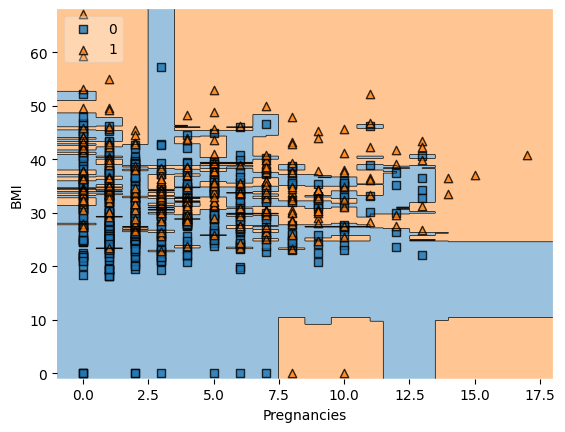

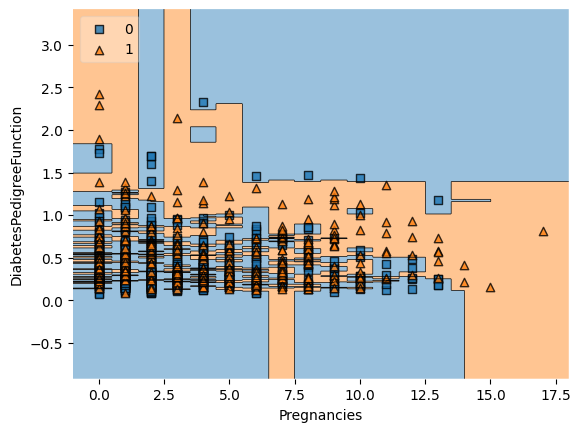

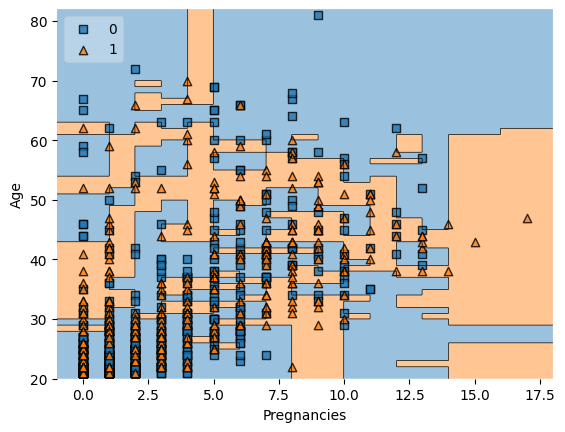

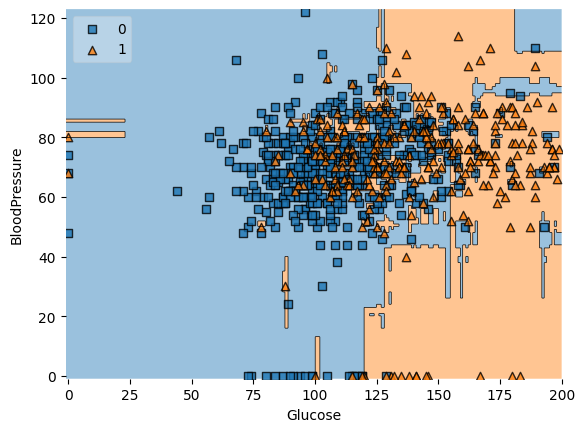

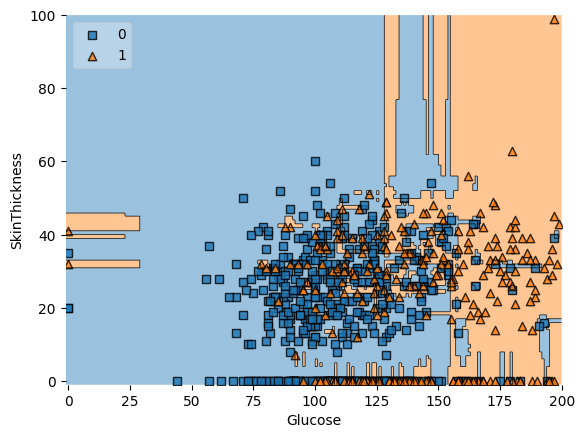

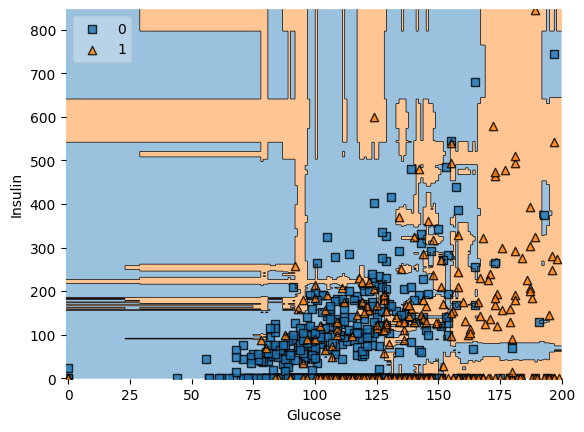

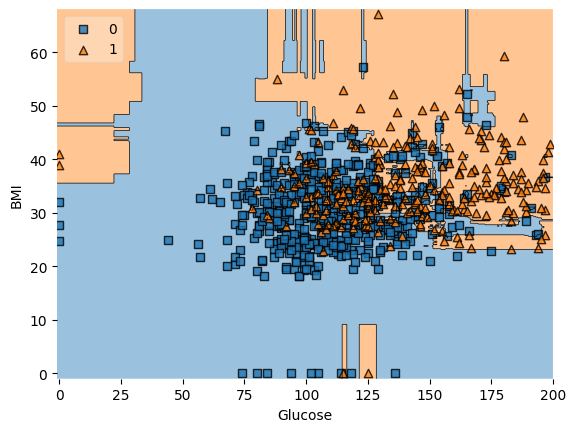

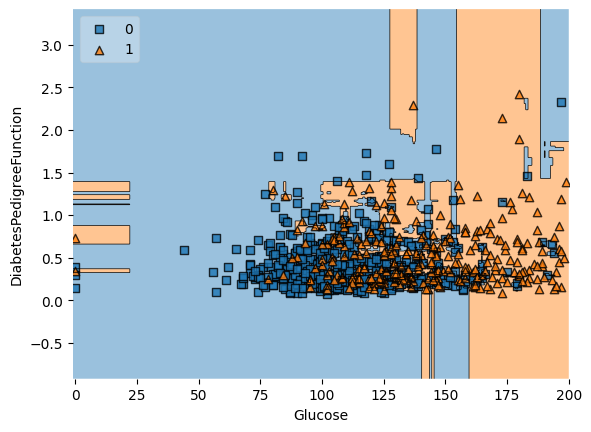

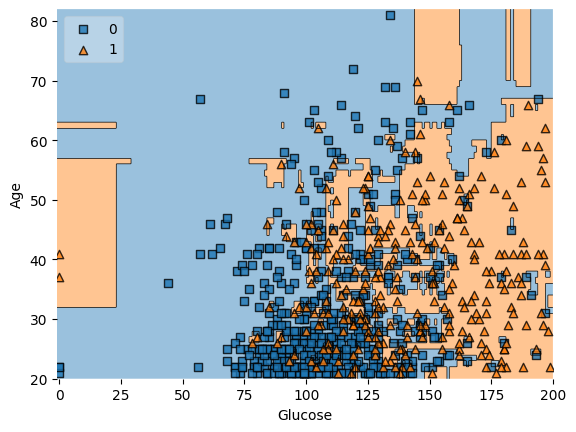

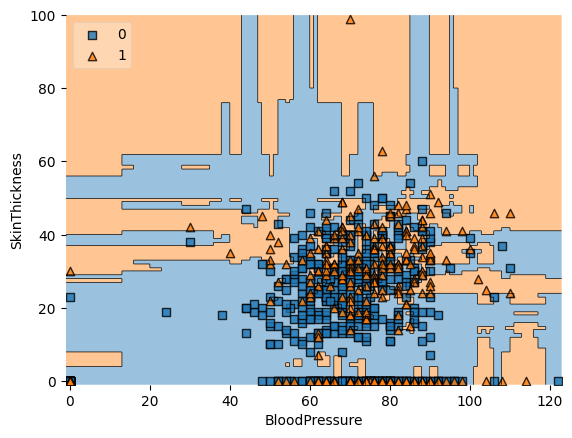

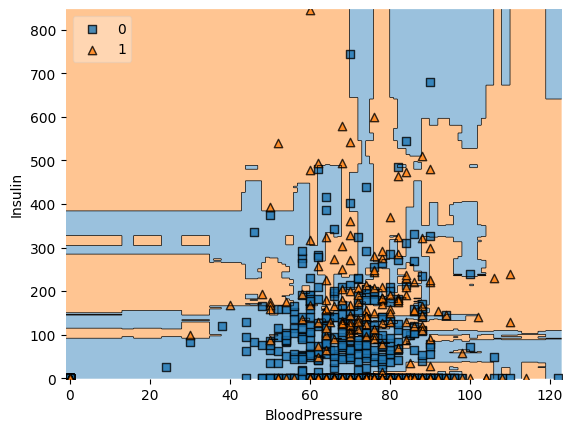

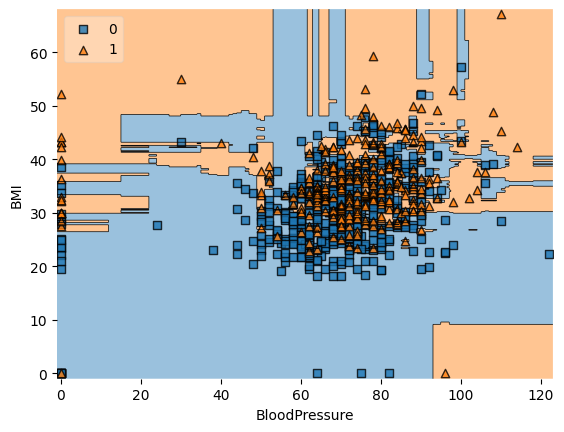

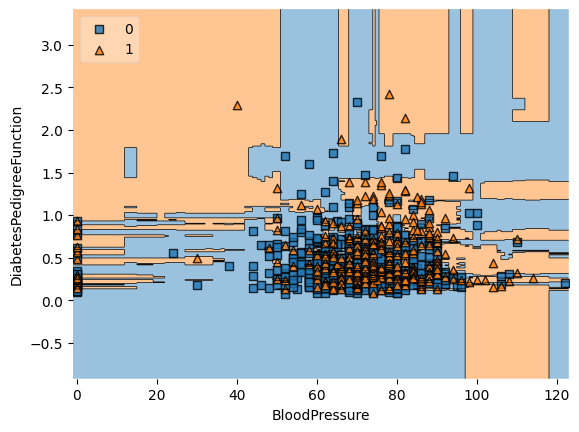

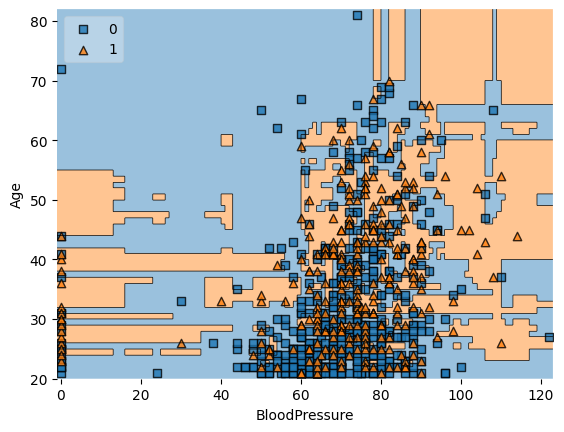

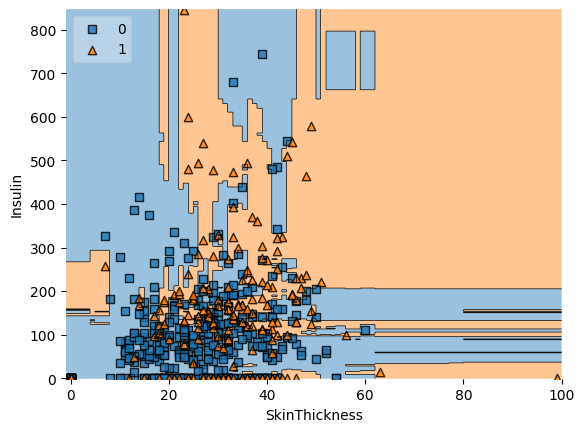

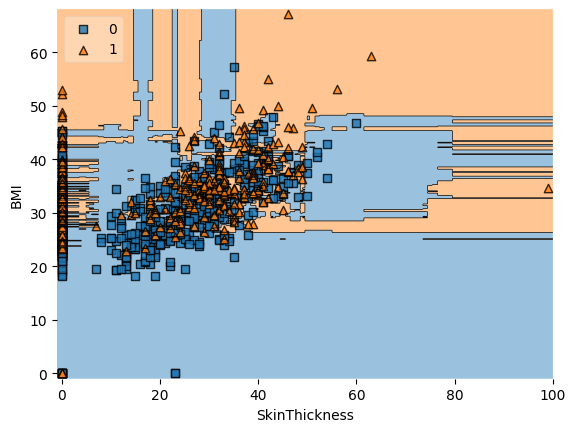

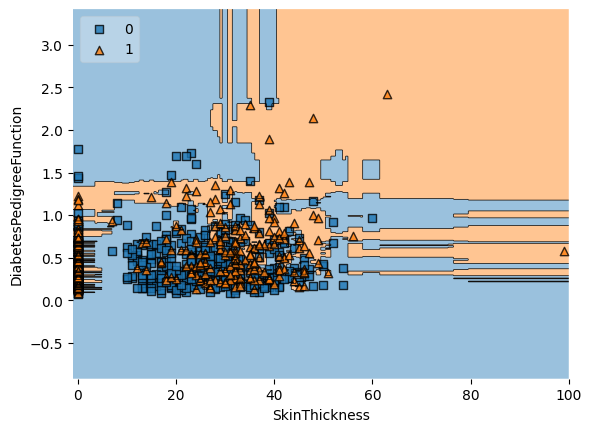

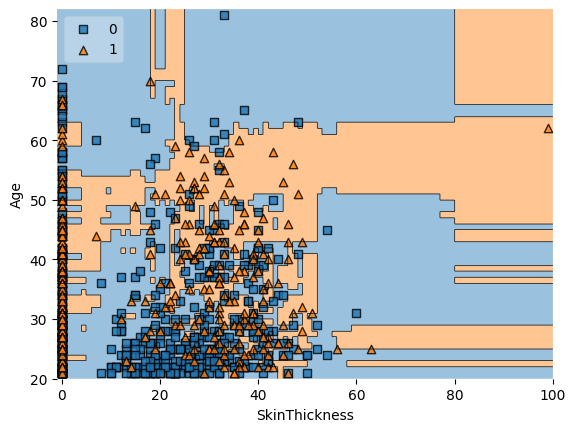

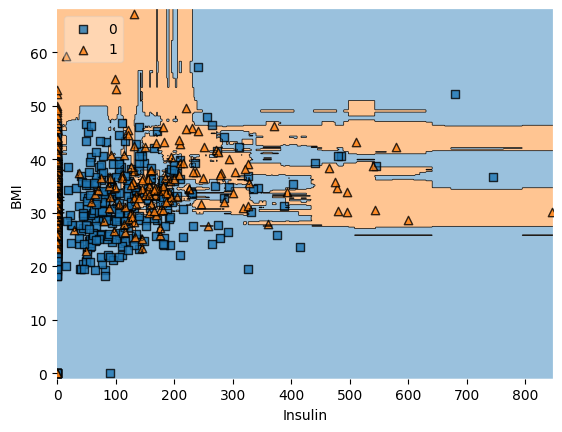

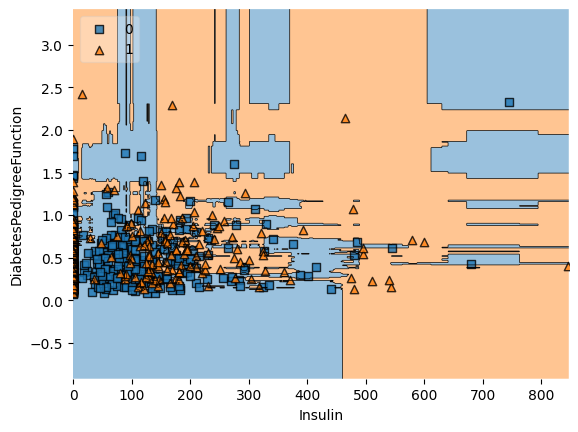

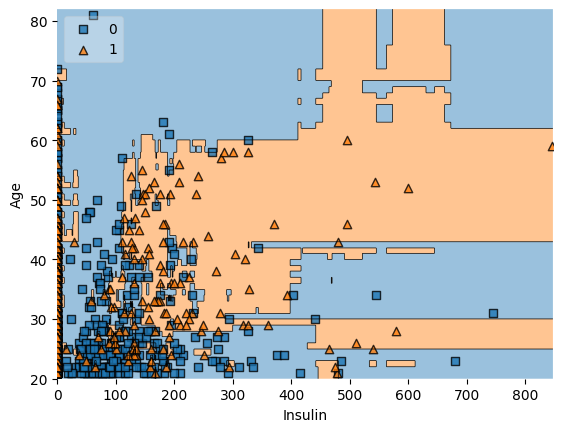

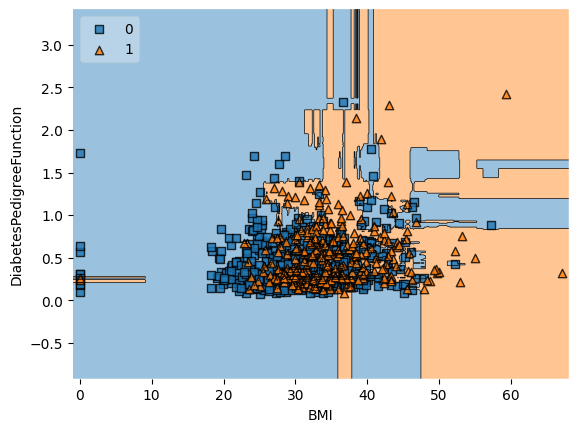

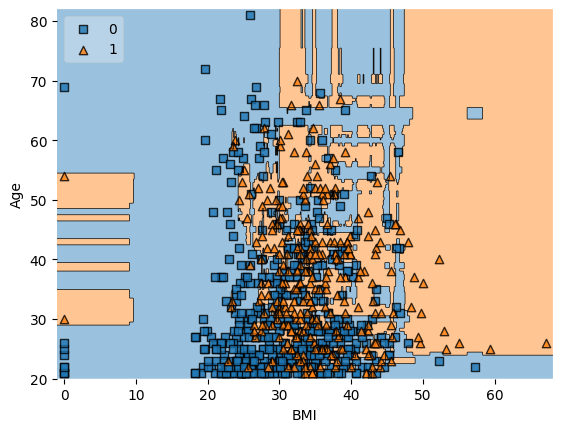

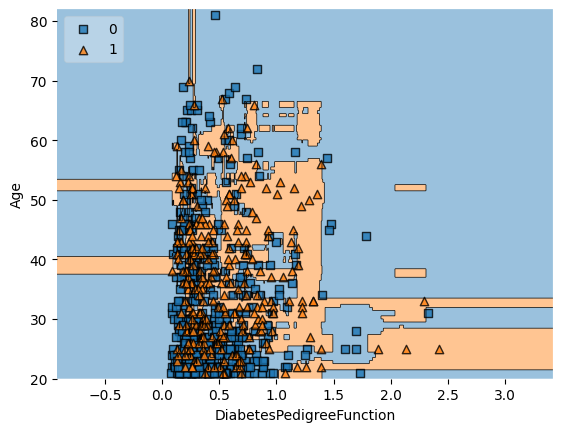

In [72]:
from mlxtend.plotting import plot_decision_regions

def classify_with_rfc(X,Y):
    x = dataset[[X,Y]].values
    y = dataset['Outcome'].astype(int).values
    rfc = RandomForestClassifier()
    rfc.fit(x,y)
    # Plotting decision region
    plot_decision_regions(x, y, clf=rfc, legend=2)
    # Adding axes annotations
    plt.xlabel(X)
    plt.ylabel(Y)
    plt.show()
    
feat = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI', 'DiabetesPedigreeFunction', 'Age']
size = len(feat)
for i in range(0,size):
    for j in range(i+1,size):
        classify_with_rfc(feat[i],feat[j])

# 2)  Eliminación de características recursivas (RFE) con bosque aleatorio

http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html 

Básicamente, utiliza uno de los métodos de clasificación (bosque aleatorio en nuestro ejemplo), asigna pesos a cada una de las características. Cuyos pesos absolutos son los más pequeños se eliminan de las características del conjunto actual. Ese procedimiento se repite recursivamente en el conjunto podado hasta que se alcanza el número deseado de características.

Al igual que el método anterior, utilizaremos 5 funciones. Sin embargo, ¿qué 5 funciones usaremos? Los elegiremos con método RFE.

In [91]:
X = dataset.iloc[:, :-1]
y = dataset.iloc[:, -1]

Accuracy is:  0.7532467532467533


<AxesSubplot: >

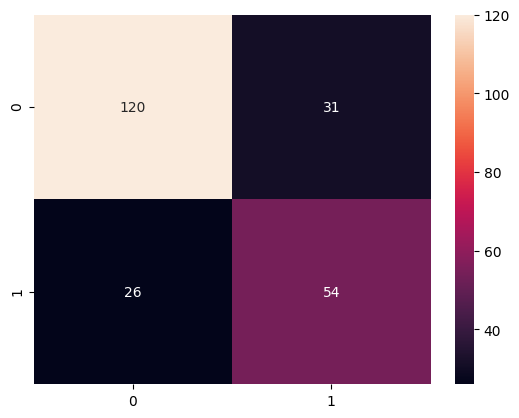

In [92]:

# split data train 70 % and test 30 %
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#random forest classifier with n_estimators=10 (default)
clf_rf = RandomForestClassifier(random_state=43)      
clr_rf = clf_rf.fit(x_train,y_train)

ac = accuracy_score(y_test,clf_rf.predict(x_test))
print('Accuracy is: ',ac)
cm = confusion_matrix(y_test,clf_rf.predict(x_test))
sns.heatmap(cm,annot=True,fmt="d")

In [93]:
from sklearn.feature_selection import RFE
# Create the RFE object and rank each pixel
clf_rf_3 = RandomForestClassifier()      
rfe = RFE(estimator=clf_rf_3, n_features_to_select=5, step=1)
rfe = rfe.fit(x_train, y_train)

In [94]:
print('Chosen best 5 feature by rfe:',x_train.columns[rfe.support_])

Chosen best 5 feature by rfe: Index(['Glucose', 'BloodPressure', 'BMI', 'DiabetesPedigreeFunction', 'Age'], dtype='object')


In [95]:
from sklearn.feature_selection import RFECV

# The "accuracy" scoring is proportional to the number of correct classifications
clf_rf_4 = RandomForestClassifier() 
rfecv = RFECV(estimator=clf_rf_4, step=1, cv=5,scoring='accuracy')   #5-fold cross-validation
rfecv = rfecv.fit(x_train, y_train)

print('Optimal number of features :', rfecv.n_features_)
print('Best features :', x_train.columns[rfecv.support_])

Optimal number of features : 7
Best features : Index(['Pregnancies', 'Glucose', 'BloodPressure', 'Insulin', 'BMI',
       'DiabetesPedigreeFunction', 'Age'],
      dtype='object')


C:\Users\sebas\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: The `grid_scores_` attribute is deprecated in version 1.0 in favor of `cv_results_` and will be removed in version 1.2.
  warnings.warn(msg, category=FutureWarning)


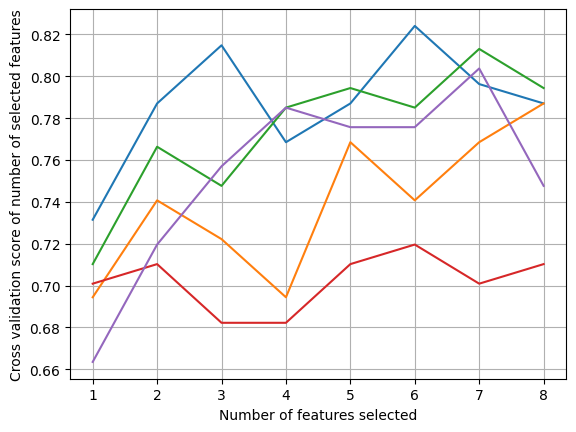

In [96]:
# Plot number of features VS. cross-validation scores
import matplotlib.pyplot as plt
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score of number of selected features")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.grid()
plt.show()

Feature ranking:
1. feature 1 (0.257169)
2. feature 5 (0.170825)
3. feature 7 (0.152281)
4. feature 6 (0.112451)
5. feature 2 (0.086121)
6. feature 0 (0.076948)
7. feature 4 (0.075251)
8. feature 3 (0.068954)


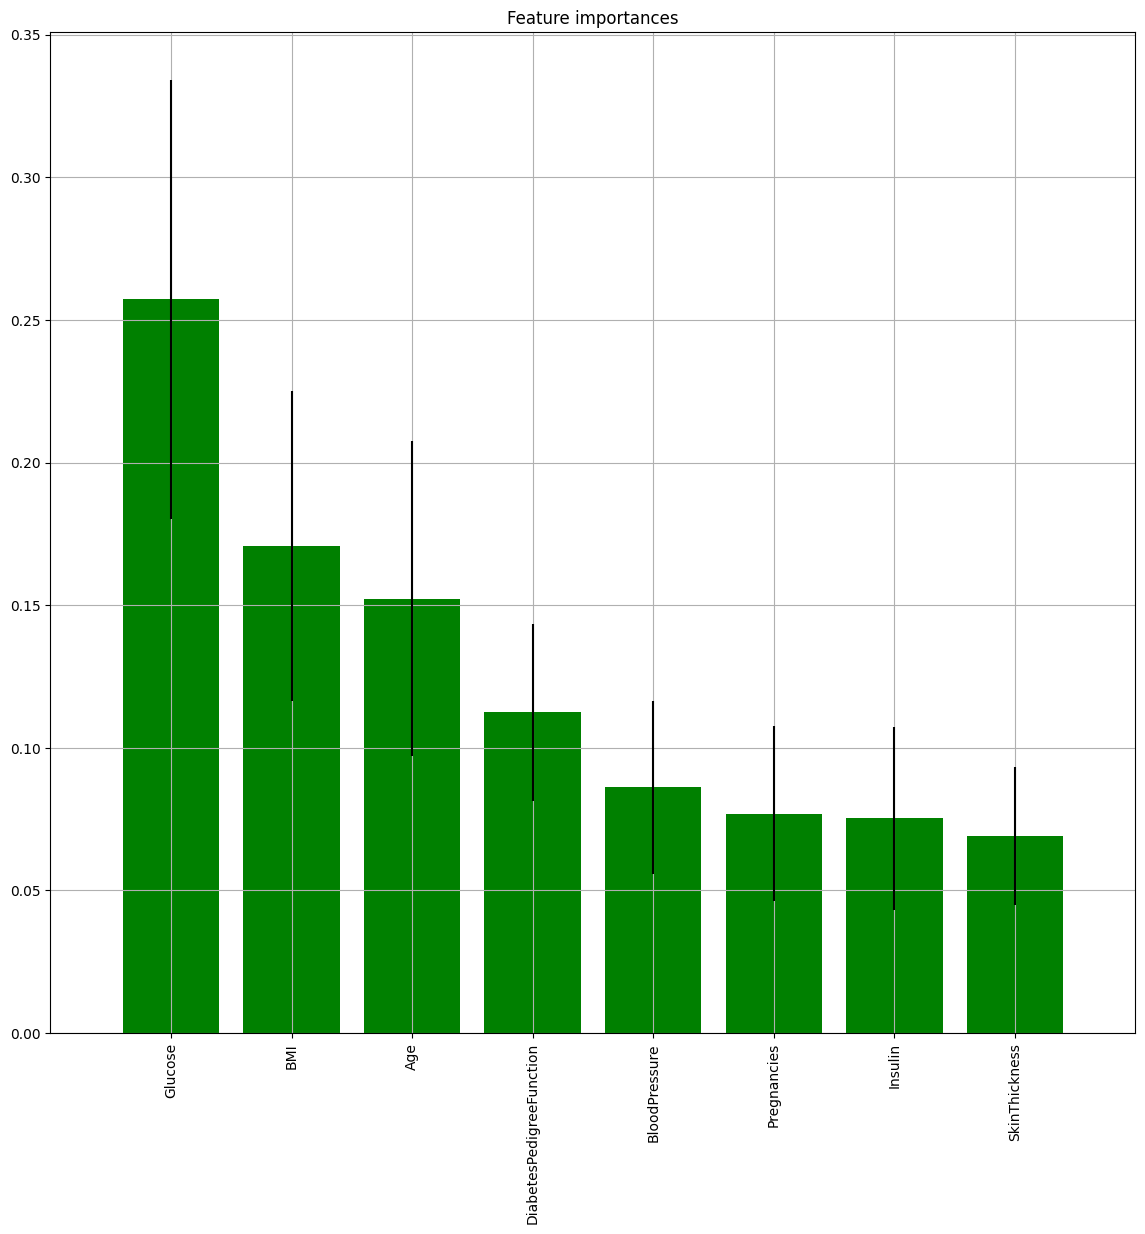

In [97]:
clf_rf_5 = RandomForestClassifier()      
clr_rf_5 = clf_rf_5.fit(x_train,y_train)
importances = clr_rf_5.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf_rf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(x_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest

plt.figure(1, figsize=(14, 13))
plt.title("Feature importances")
plt.bar(range(x_train.shape[1]), importances[indices],
       color="g", yerr=std[indices], align="center")
plt.xticks(range(x_train.shape[1]), x_train.columns[indices],rotation=90)
plt.xlim([-1, x_train.shape[1]])
plt.grid()
plt.show()